<a href="https://colab.research.google.com/github/trh-analyst/trh-analyst/blob/main/APPLIED_PROJECT_FINDINGS_THE_HAPPINESS_PROJECT_TRH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MIT 5752
Cloud Computing
Tricia Hindley

#APPLIED PROJECT FINDINGS – THE HAPPINESS PROJECT

As discussed in the design document, I had challenges with AWS and large charges related to Sagemaker. From this mistake, I gained insight on the importance of being versed in the AWS tools being used, and be sure to turn off any features/applications being used.
To answer the remainder of my queries and test my hypothesis, I utilized python in Visual Studio Code. Then, I created a notebook in Google Colab to put all my findings together. As opposed to using Word, I found that Google Colab looked more cohesive with the code and visualizations that I wanted to showcase. This colab link will then be shared to the professor for viewing; it will also be added to my GitHub.


**Hypothesis**: Countries with higher economic production will have more social support and generosity.

**Additional Questions**

1. Determine which country ranks as the happiest and least happy overall.
2.	Analyze how the happiest and least happy countries changed each year.
3.	Compare the pre-2020 and post-2020 data.
4.	Explore correlations between the elements.
5.	Identify any outliers after the correlation analysis


Data Dictionary

In [27]:
#data dictionary
happiness_datadict = pd.read_csv('/content/DataDictionary.csv')
happiness_datadict


,Column Name,Description
0,Country,Name of the country.
1,Region,Geographical region
2,Happiness Rank,Rank of the country based on happiness score
3,Happiness Score,Composite score calculated based on the metric...
4,Economy (GDP per Capita),Economic metric.
5,Family/Social Support,Metric assessing social support.
6,Health (Life Expectancy),Health-related metric.
7,Freedom,Metric assessing freedom.
8,Generosity,Metric assessing generosity.
9,Trust (Government Corruption),Metric assessing trust in government.


# Data Findings

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data to see the initial few rows
file_path = '/content/Happiness Project.csv'
happiness_data = pd.read_csv(file_path)
happiness_data.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family/Social Support,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.59,1.40,1.35,0.94,0.67,0.30,0.42,2.52,2015
1,Iceland,Western Europe,2,7.56,1.30,1.40,0.95,0.63,0.44,0.14,2.70,2015
2,Denmark,Western Europe,3,7.53,1.33,1.36,0.87,0.65,0.34,0.48,2.49,2015
3,Norway,Western Europe,4,7.52,1.46,1.33,0.89,0.67,0.35,0.37,2.47,2015
4,Canada,North America,5,7.43,1.33,1.32,0.91,0.63,0.46,0.33,2.45,2015


## Addressing Questions from Project

AWS Athena was first used with SQL and the following queries were utilized.



What are the top 10 happiest countries in 2015 vs 2024? (“Happy” being calculated by a high score for elements listed)<br><br>
SQL code used: <br>
SELECT Country, HappinessScore
FROM HappinessProject
WHERE year =  ‘2024’
ORDER BY HappinessScore DESC
LIMIT 10; <br><br>
2024 Happiness Score <br>

1. Finland:	7.741
2. Denmark:	7.583
3. Iceland:	7.525
4. Sweden:	7.344
5. Israel:	7.341
6. Netherlands:	7.319
7. Norway:	7.302
8. Luxembourg:	7.122
9. Switzerland:	7.06
10. Australia:	7.057

2015 HappinessScore <br>
1. Switzerland:	7.59
2. Iceland:	7.56
3. Denmark:	7.53
4. Norway:	7.52
5. Canada:	7.43
6. Finland:	7.41
7. Netherlands:	7.38
8. Sweden:	7.36
9. New Zealand:	7.29
10. Australia:	7.28

What are the bottom 10 happiest countries in 2015 vs 2024? (“Happy” being calculated by a high score for elements listed) <br><br>
SELECT Country, HappinessScore
FROM HappinessProject
WHERE year =  ‘2024’
ORDER BY HappinessScore ASC
LIMIT 10;

2024 HappinessScore
1. Afghanistan:	1.721
2. Lebanon:	2.707
3. Lesotho:	3.186
4. Sierra Leone:	3.245
5. Congo (Kinshasa):	3.295
6. Zimbabwe:	3.341
7. Botswana:	3.383
8. Malawi:	3.421
9. Eswatini:	3.502
10. Zambia:	3.502

2015 HappinessScore
1. Togo:	2.84
2. Burundi:	2.91
3. Syria:	3.01
4. Benin:	3.34
5. Rwanda:	3.47
6. Afghanistan: 3.58
7. Burkina Faso: 3.59
8. Guinea:	3.66
9. Ivory Coast: 3.66
10. Chad: 3.67



### Due to challenges previously discussed, Visual Studio Code and Google Colab were utilized for the remainder of the project.

**Hypothesis**: Countries with higher economic production will have more social support and generosity.

* As seen in the scatterplots below, there is a moderate positive correlation between GDP per capita and social support. This supports the hypothesis posed.

* On the contrary, there is a slight negative correlation between GDP per capita and generosity. This does not support the hypothesis posed.



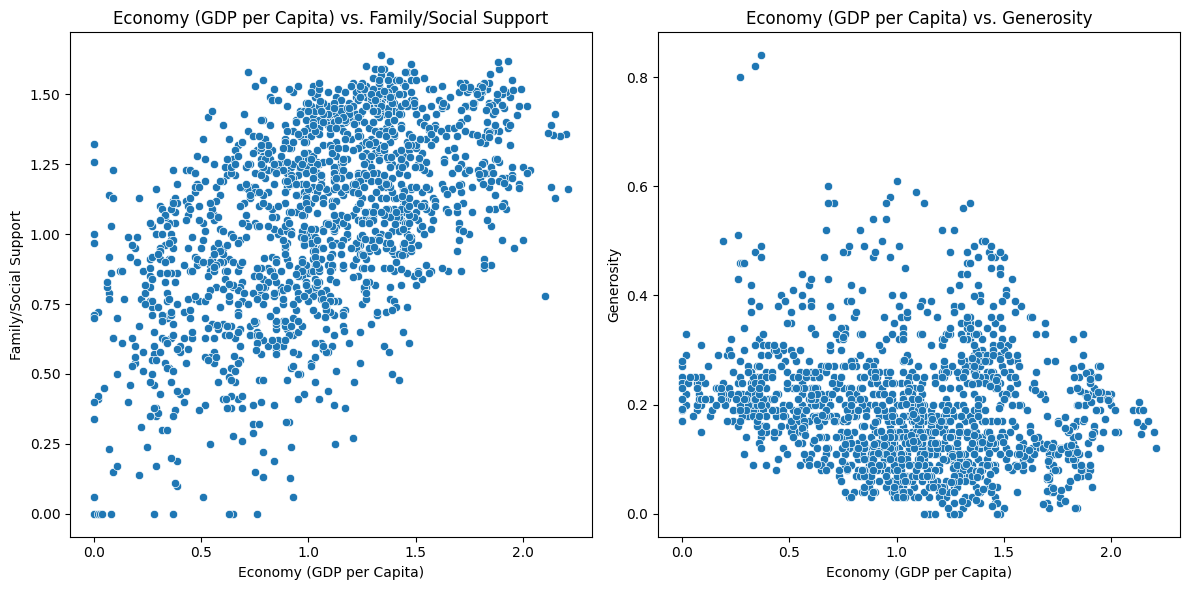

,Economy (GDP per Capita),Family/Social Support,Generosity
Economy (GDP per Capita),1.000000,0.542089,-0.171835
Family/Social Support,0.542089,1.000000,-0.011675
Generosity,-0.171835,-0.011675,1.000000


In [6]:
# Select relevant columns for hypothesis testing
hypothesis_data = happiness_data[['Economy (GDP per Capita)', 'Family/Social Support', 'Generosity']]

# Calculate correlation matrix for the hypothesis
hypothesis_corr_matrix = hypothesis_data.corr()

# Create scatter plots to visualize the relationships
plt.figure(figsize=(12, 6))

# Scatter plot for Economy vs. Family/Social Support
plt.subplot(1, 2, 1)
sns.scatterplot(data=happiness_data, x='Economy (GDP per Capita)', y='Family/Social Support')
plt.title('Economy (GDP per Capita) vs. Family/Social Support')

# Scatter plot for Economy vs. Generosity
plt.subplot(1, 2, 2)
sns.scatterplot(data=happiness_data, x='Economy (GDP per Capita)', y='Generosity')
plt.title('Economy (GDP per Capita) vs. Generosity')

plt.tight_layout()
plt.show()

hypothesis_corr_matrix

1.	Determine which country ranks as the happiest and least happy overall.

Happiest Country Overall: Finland

Least Happiest Country Overall: Afganistan

In [7]:
#determine happiest country overall

# Calculate the average happiness score for each country over all years
average_happiness = happiness_data.groupby('Country')['Happiness Score'].mean().reset_index()

# Identify the country with the highest and lowest average happiness score
happiest_country = average_happiness[average_happiness['Happiness Score'] == average_happiness['Happiness Score'].max()]
least_happy_country = average_happiness[average_happiness['Happiness Score'] == average_happiness['Happiness Score'].min()]

happiest_country, least_happy_country


(    Country  Happiness Score
 49  Finland           7.6701,
        Country  Happiness Score
 0  Afghanistan           2.8631)

2.	Analyze how the happiest and least happy countries changed each year.

Finland shows a consistent happiness score between 7 and 8 between years 2015 to 2024 with slight fluctuations.

Afganistan remains cosistent with their happiness score between 3 and 4 from 2015 until 2019, where there is a steady decline reaching a happiness score below 2.



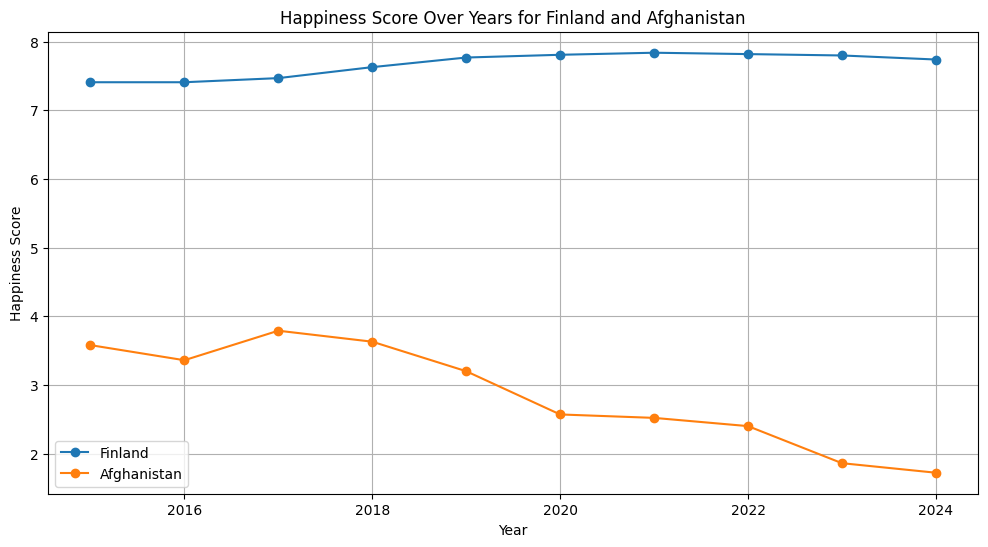

In [8]:
#how happiest and least happiest country changed over years

import matplotlib.pyplot as plt

# Filter data for the happiest and least happy countries
finland_data = happiness_data[happiness_data['Country'] == 'Finland']
afghanistan_data = happiness_data[happiness_data['Country'] == 'Afghanistan']

# Plotting
plt.figure(figsize=(12, 6))

plt.plot(finland_data['Year'], finland_data['Happiness Score'], label='Finland', marker='o')
plt.plot(afghanistan_data['Year'], afghanistan_data['Happiness Score'], label='Afghanistan', marker='o')

plt.title('Happiness Score Over Years for Finland and Afghanistan')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.legend()
plt.grid(True)
plt.show()


3.	Compare the pre-2020 and post-2020 data.

Average happiness score post-2020 is slightly higher(5.5) than pre-2020 happiness scores(5.4). This finding is suprising and future analysis would be interesting to conduct.

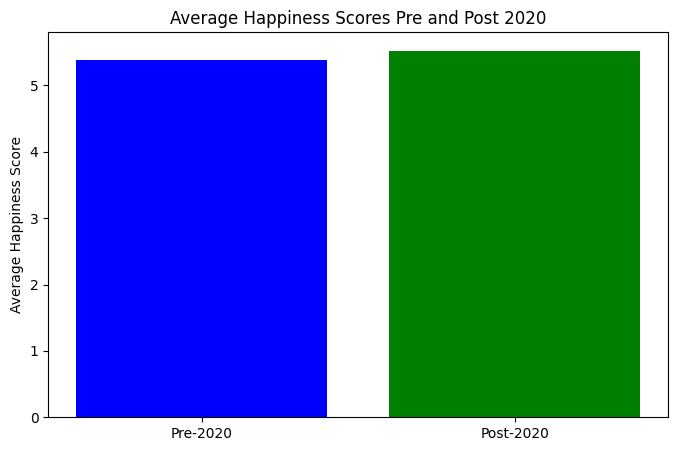

(None, 5.379475703324808, 5.5249505494505495)

In [9]:
# Separate data pre and post 2020
pre_2020_data = happiness_data[happiness_data['Year'] < 2020]
post_2020_data = happiness_data[happiness_data['Year'] >= 2020]

# Calculate average happiness scores for each period
average_pre_2020 = pre_2020_data['Happiness Score'].mean()
average_post_2020 = post_2020_data['Happiness Score'].mean()

# Visualizing the difference
years = ['Pre-2020', 'Post-2020']
averages = [average_pre_2020, average_post_2020]

plt.figure(figsize=(8, 5))
plt.bar(years, averages, color=['blue', 'green'])
plt.title('Average Happiness Scores Pre and Post 2020')
plt.ylabel('Average Happiness Score')
plt.show(), average_pre_2020, average_post_2020


4.	Explore correlations between the elements.

Strong correlation(0.66 or higher) between the happiness score and GDP per capita, family/social support, and health(life expectancy).

Moderate correlation(0.56) between the happiness score and freedom, suggesting greater freedom contributes to greater happiness.

Moderate positive correlation(0.56) between family/social support and health(life expectancy).






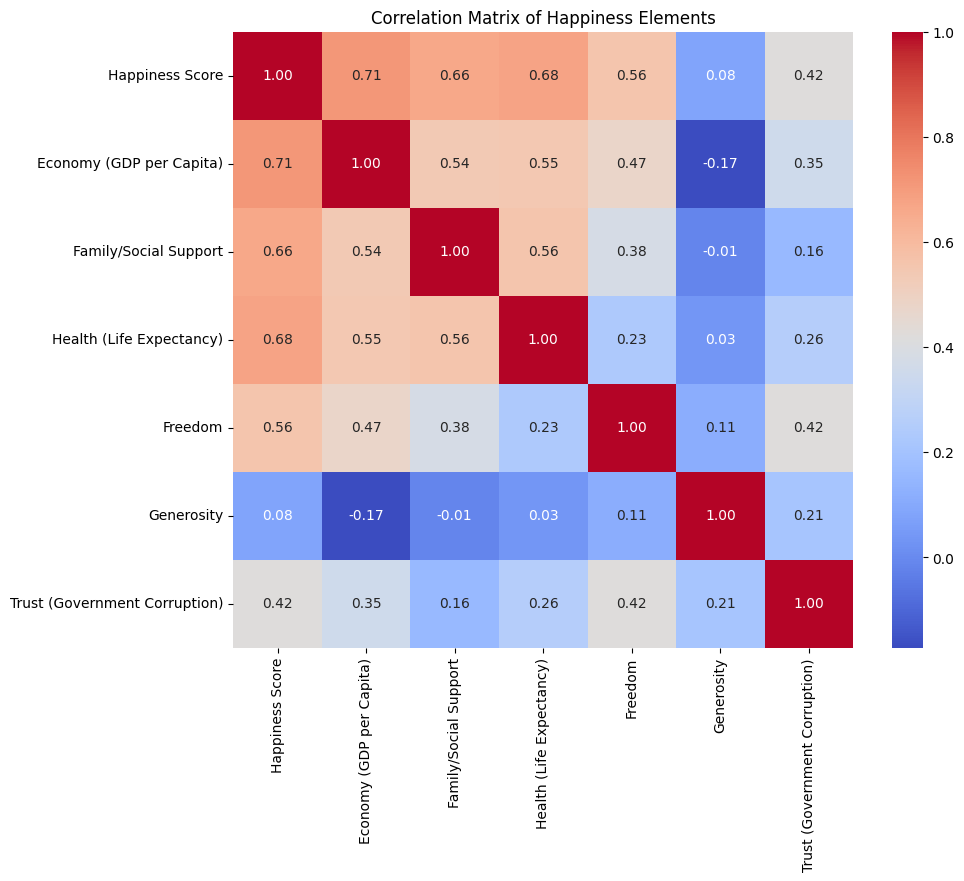

In [10]:
# Select relevant columns for correlation analysis
correlation_data = happiness_data[['Happiness Score', 'Economy (GDP per Capita)', 'Family/Social Support',
                                   'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)']]

# Calculate correlation matrix
corr_matrix = correlation_data.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Happiness Elements')
plt.show()


5.	Identify any outliers after the correlation analysis

Some outliers but none excessively distant or outside of trend.

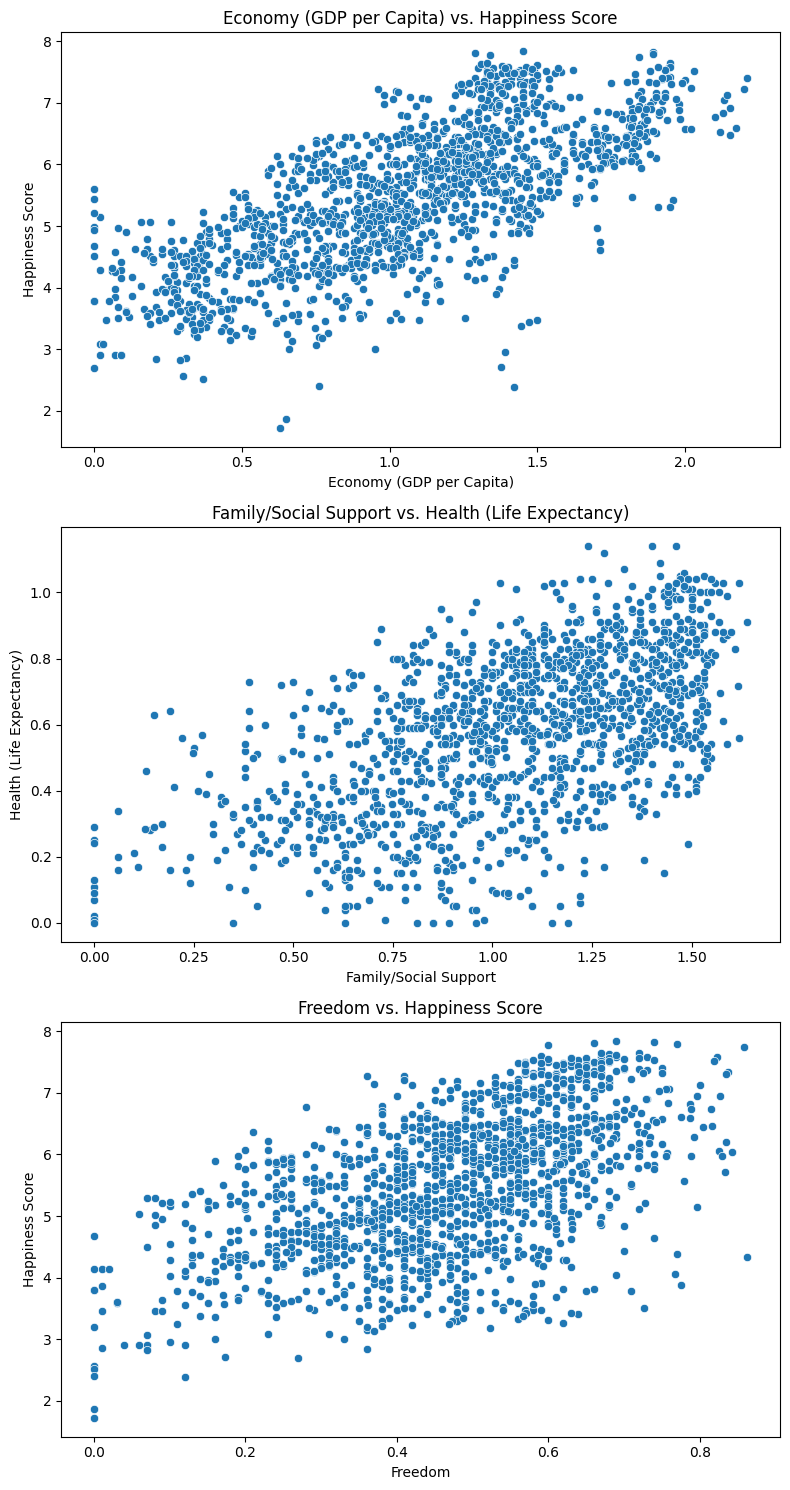

In [11]:
# Plotting scatter plots for the pairs with strong correlations
fig, ax = plt.subplots(3, 1, figsize=(8, 15))

# Economy vs. Happiness Score
sns.scatterplot(ax=ax[0], data=happiness_data, x='Economy (GDP per Capita)', y='Happiness Score')
ax[0].set_title('Economy (GDP per Capita) vs. Happiness Score')

# Family/Social Support vs. Health (Life Expectancy)
sns.scatterplot(ax=ax[1], data=happiness_data, x='Family/Social Support', y='Health (Life Expectancy)')
ax[1].set_title('Family/Social Support vs. Health (Life Expectancy)')

# Freedom vs. Happiness Score
sns.scatterplot(ax=ax[2], data=happiness_data, x='Freedom', y='Happiness Score')
ax[2].set_title('Freedom vs. Happiness Score')

plt.tight_layout()
plt.show()


# Conclusion

This project offered a variety of insights on the Happiness Project Dataset.
<br>

- To highlight, the data suggests that countries with more GDP per capita, family/social support, and health(life expectancy) are happier and have a better quality of life.
<br>
- A positive correlation between the happiness score and freedom suggests that greater freedom contributes to greater happiness.
<br>
- A positive correlation between family/social support and health(life expectancy), suggests when individuals have better social support systems, they live longer.
<br>
- Next step in this project if time allowed would be to create a machine learning model and train it to guess a country's happiness based on the data given.

Challenges/Lessons Learned
- AWS is a great platform, but you need to be aware of the applications being used, and turn off when not in use.
- Each environment is slightly different for coding in python. I had challenges moving code from Visual Studio Code to Google Colab. If I were to repeat this project, I would try to stay in one environment. This would limit the amount of modications to the code needed to set each environment.
- I enjoyed that this was an individual project and so open ended. I made a lot of mistakes along the way, and it forced me to grow my coding and analyst skills. I hope to build from this project and add to my porfolio.

References:

* ChatGPT utilized to assist with python coding/check for errors.

Data was found on Kaggle.com. Data for the years 2015 to 2024 were found on two different webpages.

*   2015 – 2019: https://www.kaggle.com/datasets/mathurinache/world-happiness-report
*  2020-2024: https://www.kaggle.com/datasets/sazidthe1/global-happiness-scores-and-factors?select=WHR_2023.csv




